<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

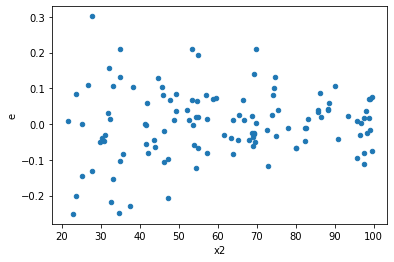

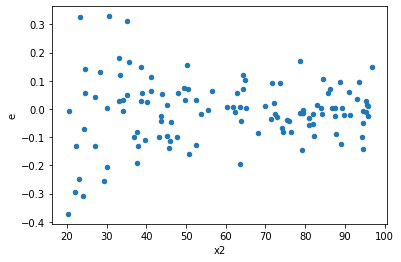

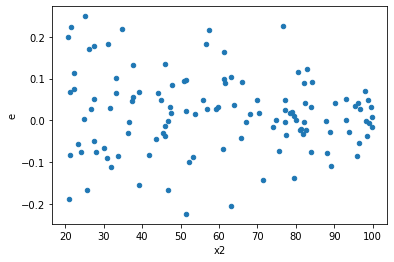

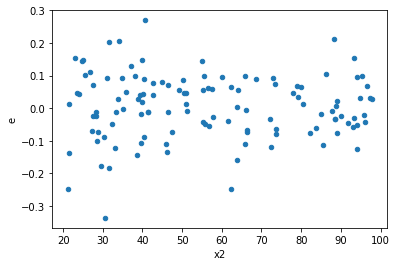

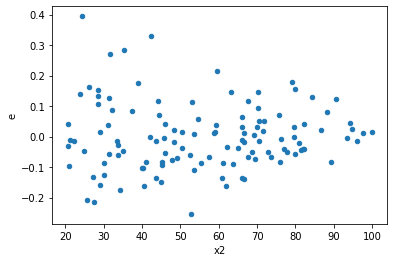

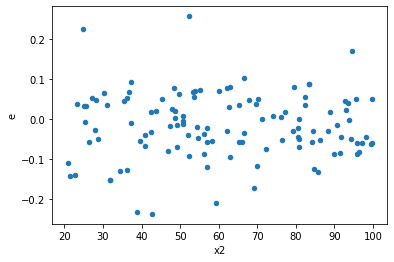

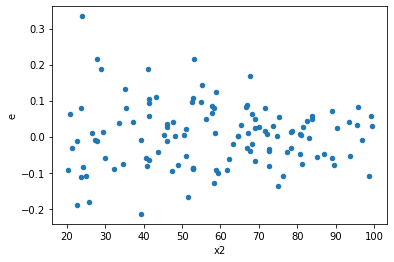

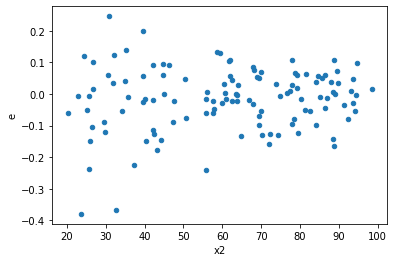

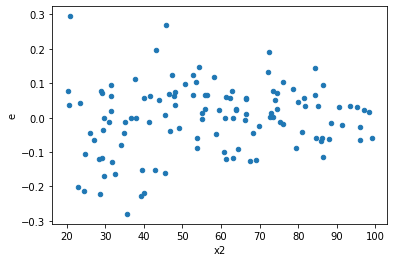

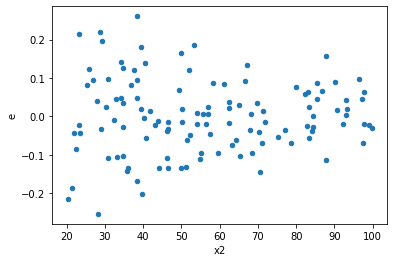

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
393.0,46.0,46.0,0.3890381655776933,0.3936291618916522,0.008457351425602028,0.008557155693296787,1.0118008892704438,0.9684369449347079,0.5157815275326461,0.48421847246735394,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.6961663575585997,0.21413902931834905,0.015134051251273905,0.004655196289529327,0.30759749734146546,0.00010881434356102928,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,1.1137450183560345,0.2171921742257925,0.024211848225131182,0.004721569004908533,0.19501068076280456,1.5456044897942733e-07,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.5584663153857621,0.2041666388851951,0.012140572073603523,0.004438405193156415,0.3655845182787192,0.0008794997800753764,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.6465993886727701,0.27974549497039625,0.014056508449408046,0.006081423803704266,0.43264113741989535,0.0053309529079425206,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.8697448706694153,0.2411084201085796,0.01890749718846555,0.005241487393664774,0.27721740965601327,2.7670997745379112e-05,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.4275868444772266,0.20983871349426464,0.009295366184287534,0.004561711162918797,0.49075109817940327,0.01748720710142732,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,0.5427227536654293,0.15343696852690442,0.01179832073185716,0.003335586272324009,0.28271703644379215,3.605998182452853e-05,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.7805979315996838,0.24250588878476165,0.01696952025216704,0.005271867147494819,0.31066683495790587,0.0001234857431214292,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.7552521985619086,0.21824461714751375,0.016418526055693664,0.0047444481988589944,0.28896919143443456,4.826475725651255e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    832
Reject001=1 : Homoscedasticity      168
Name: Result_test, dtype: int64